In [1]:
%matplotlib inline 
import numpy as np 
import scipy as sp 
import matplotlib as mpl
import matplotlib.cm as cm 
import matplotlib.pyplot as plt
import pandas as pd 
pd.set_option('display.width', 500)
pd.set_option('display.max_columns', 100)
pd.set_option('display.notebook_repr_html', True)
import seaborn as sns
sns.set(style="whitegrid")
import warnings
warnings.filterwarnings('ignore')
import seaborn as sns

In [2]:
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')

In [3]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


# Plotting the distributions of different variables

0    549
1    342
Name: Survived, dtype: int64

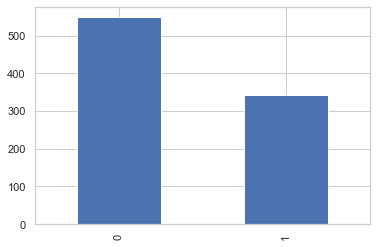

In [5]:
train['Survived'].value_counts().plot(kind='bar')
train['Survived'].value_counts()

24.00    30
22.00    27
18.00    26
19.00    25
30.00    25
         ..
55.50     1
70.50     1
66.00     1
23.50     1
0.42      1
Name: Age, Length: 88, dtype: int64

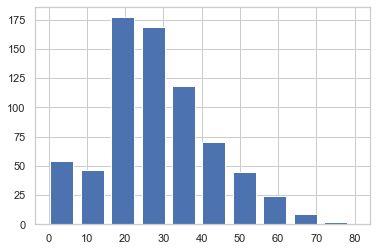

In [6]:
train['Age'].hist(width=6)
train['Age'].value_counts()

male      577
female    314
Name: Sex, dtype: int64

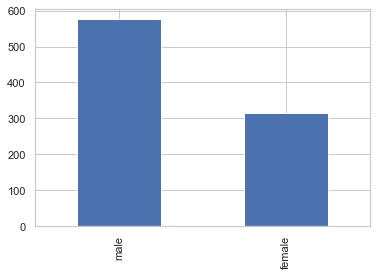

In [7]:
train['Sex'].value_counts().plot(kind='bar')
train['Sex'].value_counts()

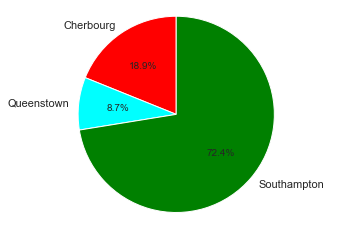

In [8]:
label = ["Cherbourg", "Queenstown", "Southampton"]
sizes = [sum(train['Embarked']=='C'), sum(train['Embarked']=='Q'), sum(train['Embarked']=='S')]
colors=['red','aqua','green']
plt.pie(sizes, labels = label, colors = colors,autopct='%1.1f%%',startangle=90)

plt.axis('equal')
plt.show()

# Comparing Surivial Rates Among Variables

In [9]:
def stackedbar(variable):
    Deaths=train[train['Survived']==0][variable].value_counts()/len(train['Survived']==0)
    Survivors=train[train['Survived']==1][variable].value_counts()/len(train['Survived']==1)
    data = pd.DataFrame([Deaths,Survivors])
    data.index=['Deaths', 'Survived']
    data.plot(kind='bar', stacked = True, title = "Percentage based on Sex")
    return data.head()

12.350735499099814

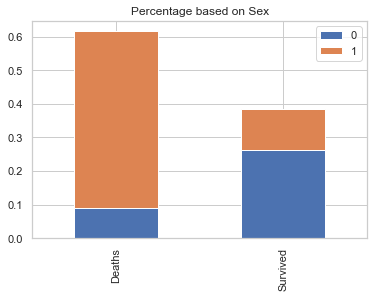

In [52]:
stackedbar('Sex')
(0.261504/0.090909)/(0.122334/.525253)

3.934184137190244

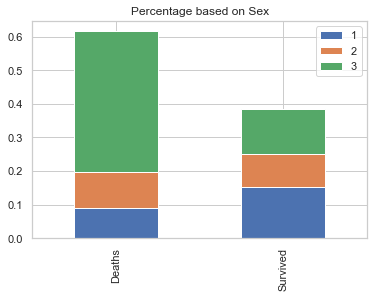

In [11]:
stackedbar('Pclass')

1/((0.134/0.418)/((0.153+0.0976)/(.0898+.1089)))

,S,C,Q
Deaths,0.479237,0.084175,0.05275
Survived,0.243547,0.104377,0.03367


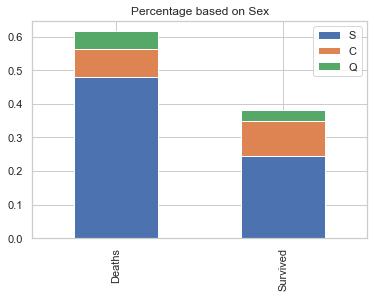

In [12]:
stackedbar('Embarked')

,0,1,2,3,4,5,8
Deaths,0.446689,0.108866,0.016835,0.013468,0.016835,0.005612,0.007856
Survived,0.235690,0.125701,0.014590,0.004489,0.003367,NaN,NaN


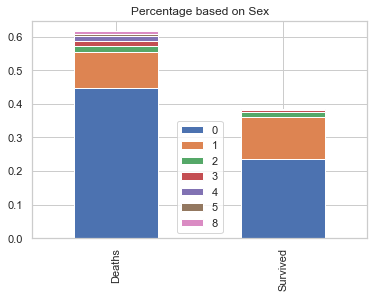

In [13]:
stackedbar("SibSp")

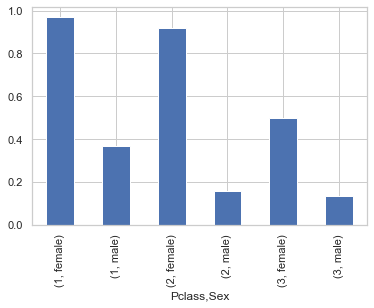

In [14]:
gender_and_class_survival = train.groupby(['Pclass','Sex']).mean()
gender_and_class_survival['Survived'].plot.bar()

# Correlation Heatmap

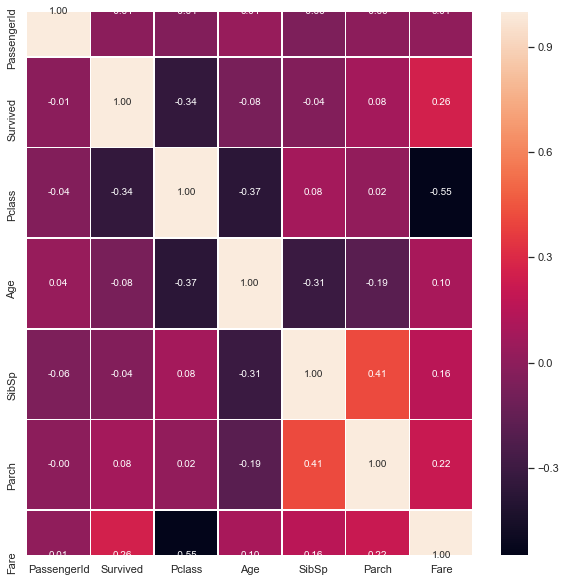

In [15]:
f,ax = plt.subplots(figsize=(10,10))
sns.heatmap(train.corr(), annot=True, linewidths=0.5, fmt= '.2f', ax=ax)

# Feature Engineering

In [16]:
all_data = pd.concat([train,test])
all_data.shape

(1309, 12)

# Mapping and Encoding

,0,1
Deaths,0.090909,0.525253
Survived,0.261504,0.122334


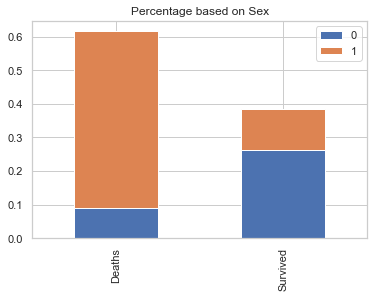

In [17]:
sex_map={"male":1,"female":0}
train["Sex"]=train["Sex"].map(sex_map)
test["Sex"]=test["Sex"].map(sex_map)
stackedbar("Sex")

# Name/Title mapping

In [18]:
train.insert(value=train.Name.map(lambda name: name.split(",")[1].split(".")[0].strip()),loc=12,column="Title")
test.insert(value=test.Name.map(lambda name: name.split(",")[1].split(".")[0].strip()),loc=11,column="Title")

In [19]:
title_map={"Capt": "Officer",
            "Col": "Officer",
            "Major": "Officer",
            "Jonkheer": "Royalty",
            "Don": "Royalty",
            "Sir" : "Royalty",
            "Dr": "Officer",
            "Rev": "Officer",
            "the Countess":"Royalty",
            "Dona": "Royalty",
            "Mme":  "Mrs",
            "Mlle": "Miss",
            "Ms": "Mrs",
            "Mr" : "Mr",
            "Mrs" : "Mrs",
            "Miss" : "Miss",
            "Master" : "Master",
            "Lady" : "Royalty"
          }

train["Title"]=train.Title.map(title_map)
test["Title"]=test.Title.map(title_map)

In [20]:
for i in train.columns:
    print(i + ": "+str(sum(train[i].isnull()))+" missing values")

PassengerId: 0 missing values
Survived: 0 missing values
Pclass: 0 missing values
Name: 0 missing values
Sex: 0 missing values
Age: 177 missing values
SibSp: 0 missing values
Parch: 0 missing values
Ticket: 0 missing values
Fare: 0 missing values
Cabin: 687 missing values
Embarked: 2 missing values
Title: 0 missing values


In [21]:
for i in test.columns:
    print(i + ": " + str(sum(test[i].isnull()))+" missing values")

PassengerId: 0 missing values
Pclass: 0 missing values
Name: 0 missing values
Sex: 0 missing values
Age: 86 missing values
SibSp: 0 missing values
Parch: 0 missing values
Ticket: 0 missing values
Fare: 1 missing values
Cabin: 327 missing values
Embarked: 0 missing values
Title: 0 missing values


In [22]:
train_set1 = train.groupby(['Pclass','SibSp'])
train_set1_median = train_set1.median()
train_set1_median

PassengerId  Survived  Sex   Age  Parch      Fare
Pclass SibSp                                                   
1      0            476.0       1.0  1.0  37.0    0.0   39.6000
       1            485.0       1.0  0.0  38.0    0.0   79.2000
       2            572.0       1.0  0.0  44.0    0.0  133.6500
       3             89.0       1.0  0.0  23.0    2.0  263.0000
2      0            407.0       0.0  1.0  30.0    0.0   13.0000
       1            451.0       1.0  0.0  29.0    1.0   26.0000
       2            565.5       0.5  1.0  23.5    1.0   39.0000
       3            727.0       1.0  0.0  30.0    0.0   21.0000
3      0            472.0       0.0  1.0  26.0    0.0    7.8958
       1            372.0       0.0  1.0  25.0    0.0   15.5500
       2            334.0       0.0  1.0  19.5    0.0   19.2583
       3            302.5       0.0  0.0   6.0    1.0   25.4667
       4            264.5       0.0  1.0   6.5    1.5   31.2750
       5            387.0       0.0  1.0  11.0    2.0   46.9000
       8            325.0       0.0  1.0   NaN    2.0   69.5500

In [23]:
test_set1 = test.groupby(['Pclass','SibSp'])
test_set1_median = test_set1.median()
test_set1_median

PassengerId  Sex   Age  Parch       Fare
Pclass SibSp                                          
1      0           1088.0  1.0  39.0    0.0   42.50000
       1           1109.5  0.5  46.0    0.0   82.06250
       2            969.0  0.0  55.0    0.0   51.47920
       3            945.0  0.0  28.0    2.0  263.00000
2      0           1117.5  1.0  27.0    0.0   13.00000
       1           1139.0  1.0  29.0    0.0   26.00000
       2           1077.5  0.5  21.0    0.5   31.50000
3      0           1095.5  1.0  24.0    0.0    7.82920
       1           1084.0  0.0  20.0    1.0   15.24580
       2           1059.0  1.0  19.5    0.0   21.67920
       3           1281.0  1.0  29.0    1.0   21.07500
       4           1076.0  1.0  11.5    2.0   30.25625
       5           1032.0  0.0  10.0    2.0   46.90000
       8           1166.0  0.5  14.5    2.0   69.55000

In [24]:
def fill_age(dataset,dataset_med):
    for x in range(len(dataset)):
        if dataset["Pclass"][x]==1:
            if dataset["SibSp"][x]==0:
                return dataset_med.loc[1,0]["Age"]
            elif dataset["SibSp"][x]==1:
                return dataset_med.loc[1,1]["Age"]
            elif dataset["SibSp"][x]==2:
                return dataset_med.loc[1,2]["Age"]
            elif dataset["SibSp"][x]==3:
                return dataset_med.loc[1,3]["Age"]
        elif dataset["Pclass"][x]==2:
            if dataset["SibSp"][x]==0:
                return dataset_med.loc[2,0]["Age"]
            elif dataset["SibSp"][x]==1:
                return dataset_med.loc[2,1]["Age"]
            elif dataset["SibSp"][x]==2:
                return dataset_med.loc[2,2]["Age"]
            elif dataset["SibSp"][x]==3:
                return dataset_med.loc[2,3]["Age"]
        elif dataset["Pclass"][x]==3:
            if dataset["SibSp"][x]==0:
                return dataset_med.loc[3,0]["Age"]
            elif dataset["SibSp"][x]==1:
                return dataset_med.loc[3,1]["Age"]
            elif dataset["SibSp"][x]==2:
                return dataset_med.loc[3,2]["Age"]
            elif dataset["SibSp"][x]==3:
                return dataset_med.loc[3,3]["Age"]
            elif dataset["SibSp"][x]==4:
                return dataset_med.loc[3,4]["Age"]
            elif dataset["SibSp"][x]==5:
                return dataset_med.loc[3,5]["Age"]
            elif dataset["SibSp"][x]==8:
                return dataset_med.loc[3]["Age"].median()  #I used the median age of Pclass=3 as a replacement as there is no median value for SibSp=8 in training dataset

In [25]:
train['Age'] = train['Age'].fillna(fill_age(train,train_set1_median))
test['Age'] = test['Age'].fillna(fill_age(test,test_set1_median))

In [26]:
all_data.Cabin.unique()

array([nan, 'C85', 'C123', 'E46', 'G6', 'C103', 'D56', 'A6',
       'C23 C25 C27', 'B78', 'D33', 'B30', 'C52', 'B28', 'C83', 'F33',
       'F G73', 'E31', 'A5', 'D10 D12', 'D26', 'C110', 'B58 B60', 'E101',
       'F E69', 'D47', 'B86', 'F2', 'C2', 'E33', 'B19', 'A7', 'C49', 'F4',
       'A32', 'B4', 'B80', 'A31', 'D36', 'D15', 'C93', 'C78', 'D35',
       'C87', 'B77', 'E67', 'B94', 'C125', 'C99', 'C118', 'D7', 'A19',
       'B49', 'D', 'C22 C26', 'C106', 'C65', 'E36', 'C54',
       'B57 B59 B63 B66', 'C7', 'E34', 'C32', 'B18', 'C124', 'C91', 'E40',
       'T', 'C128', 'D37', 'B35', 'E50', 'C82', 'B96 B98', 'E10', 'E44',
       'A34', 'C104', 'C111', 'C92', 'E38', 'D21', 'E12', 'E63', 'A14',
       'B37', 'C30', 'D20', 'B79', 'E25', 'D46', 'B73', 'C95', 'B38',
       'B39', 'B22', 'C86', 'C70', 'A16', 'C101', 'C68', 'A10', 'E68',
       'B41', 'A20', 'D19', 'D50', 'D9', 'A23', 'B50', 'A26', 'D48',
       'E58', 'C126', 'B71', 'B51 B53 B55', 'D49', 'B5', 'B20', 'F G63',
       'C62 C64',

In [27]:
train['Cabin']=train['Cabin'].fillna('U')
test['Cabin']=test['Cabin'].fillna('U')
train["Cabin"]=train["Cabin"].map(lambda x: x[0])
test["Cabin"]=test["Cabin"].map(lambda x: x[0])

In [28]:


def new_cabin_features(dataset):
    dataset["Cabin A"]=np.where(dataset["Cabin"]=="A",1,0)
    dataset["Cabin B"]=np.where(dataset["Cabin"]=="B",1,0)
    dataset["Cabin C"]=np.where(dataset["Cabin"]=="C",1,0)
    dataset["Cabin D"]=np.where(dataset["Cabin"]=="D",1,0)
    dataset["Cabin E"]=np.where(dataset["Cabin"]=="E",1,0)
    dataset["Cabin F"]=np.where(dataset["Cabin"]=="F",1,0)
    dataset["Cabin G"]=np.where(dataset["Cabin"]=="G",1,0)
    dataset["Cabin T"]=np.where(dataset["Cabin"]=="T",1,0)  #Cabin U is when the rest of cabins are 0
    



In [29]:
new_cabin_features(train)
new_cabin_features(test)

In [30]:
def new_embark_features(dataset):
    dataset["Embarked S"]=np.where(dataset["Embarked"]=="S",1,0)
    dataset["Embarked C"]=np.where(dataset["Embarked"]=="C",1,0)  #Embarked on Q is when the rest of embarked are 0

In [31]:
new_embark_features(train)
new_embark_features(test)

In [32]:
#Fill in the one missing Fare value in the test set with the median for Fare
test["Fare"]=test["Fare"].fillna(np.mean(test["Fare"]))

## Encoding categorical features 

In [33]:
title_map_2={'Mr':1, 
           'Mrs':1, 
           'Miss':1,
           'Master':2,
           'Officer':3,
           'Royalty':4}
train["Title"]=train["Title"].map(title_map_2)
test["Title"]=test["Title"].map(title_map_2)

In [34]:
#Dropping these fields as they do not play a role in improving the models

train.drop(["Name","Ticket","PassengerId","Embarked","Cabin"],inplace=True,axis=1)
test.drop(["Name","Ticket","Embarked","Cabin"],inplace=True,axis=1)
train.tail()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Title,Cabin A,Cabin B,Cabin C,Cabin D,Cabin E,Cabin F,Cabin G,Cabin T,Embarked S,Embarked C
886,0,2,1,27.0,0,0,13.00,3,0,0,0,0,0,0,0,0,1,0
887,1,1,0,19.0,0,0,30.00,1,0,1,0,0,0,0,0,0,1,0
888,0,3,0,25.0,1,2,23.45,1,0,0,0,0,0,0,0,0,1,0
889,1,1,1,26.0,0,0,30.00,1,0,0,1,0,0,0,0,0,0,1
890,0,3,1,32.0,0,0,7.75,1,0,0,0,0,0,0,0,0,0,0


# Model Creation/Cross Validation

In [35]:
from sklearn.preprocessing import LabelEncoder
from sklearn import model_selection
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import confusion_matrix
import scikitplot as skplt
from sklearn.model_selection import cross_val_score

# suppress warning messages
def warn(*args, **kwargs):
    pass
import warnings
warnings.warn = warn

## Splitting test and training set

In [36]:
x=train.drop(["Survived"],axis=1)
y=train["Survived"]
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=0)

## Cross Validation

In [37]:
k_fold = KFold(n_splits=5, shuffle=True, random_state=0)

In [38]:
def acc_score(model):
    return np.mean(cross_val_score(model,x_train,y_train,cv=k_fold,scoring="accuracy"))

In [39]:
def confusion_matrix_model(model_used):
    cm=confusion_matrix(y_test,model_used.predict(x_test))
    col=["Predicted Dead","Predicted Survived"]
    cm=pd.DataFrame(cm)
    cm.columns=["Predicted Dead","Predicted Survived"]
    cm.index=["Actual Dead","Actual Survived"]
    cm[col]=np.around(cm[col].div(cm[col].sum(axis=1),axis=0),decimals=2)
    return cm

In [40]:
def importance_of_features(model):
    features = pd.DataFrame()
    features['feature'] = x_train.columns
    features['importance'] = model.feature_importances_
    features.sort_values(by=['importance'], ascending=True, inplace=True)
    features.set_index('feature', inplace=True)
    return features.plot(kind='barh', figsize=(10,10))

In [41]:
def aucscore(model,has_proba=True):
    if has_proba:
        fpr,tpr,thresh=skplt.metrics.roc_curve(y_test,model.predict_proba(x_test)[:,1])
    else:
        fpr,tpr,thresh=skplt.metrics.roc_curve(y_test,model.decision_function(x_test))
    x=fpr
    y=tpr
    auc= skplt.metrics.auc(x,y)
    return auc
def plt_roc_curve(name,model,has_proba=True):
    if has_proba:
        fpr,tpr,thresh=skplt.metrics.roc_curve(y_test,model.predict_proba(x_test)[:,1])
    else:
        fpr,tpr,thresh=skplt.metrics.roc_curve(y_test,model.decision_function(x_test))
    x=fpr
    y=tpr
    auc= skplt.metrics.auc(x,y)
    plt.plot(x,y,label='ROC curve for %s (AUC = %0.2f)' % (name, auc))
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim((0,1))
    plt.ylim((0,1))
    plt.xlabel("False Positive Rate")
    plt.ylabel("True Positive Rate")
    plt.title("ROC Curve")
    plt.legend(loc="lower right")
    plt.show()

# Logistic Regression

In [42]:
logreg=LogisticRegression()
logreg.fit(x_train,y_train)

print("Accuracy: " + str(acc_score(logreg)))
confusion_matrix_model(logreg)

Accuracy: 0.8202994188909681


,Predicted Dead,Predicted Survived
Actual Dead,0.81,0.19
Actual Survived,0.26,0.74


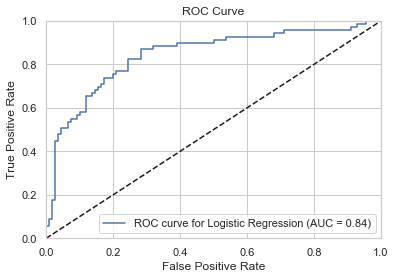

In [43]:
plt_roc_curve("Logistic Regression",logreg,has_proba=True)

# naïve Bayes

In [44]:
gauss = GaussianNB()
gauss.fit(x_train,y_train)

print("Accuracy: "+str(acc_score(gauss)))
confusion_matrix_model(gauss)

Accuracy: 0.7316950654978824


,Predicted Dead,Predicted Survived
Actual Dead,0.78,0.22
Actual Survived,0.22,0.78


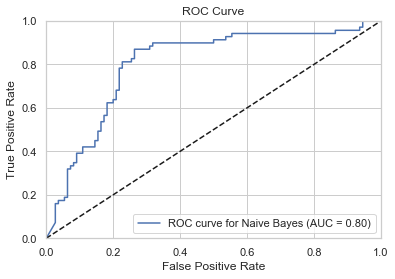

In [45]:
plt_roc_curve("Naive Bayes",gauss,has_proba=True)

# Random Forest Classifier

In [46]:
ranfor = RandomForestClassifier(n_estimators=50, max_features='sqrt',max_depth=6,random_state=10)
ranfor = ranfor.fit(x_train,y_train)
print("Accuracy: " + str(acc_score(ranfor)))
confusion_matrix_model(ranfor)

Accuracy: 0.8343642273219738


,Predicted Dead,Predicted Survived
Actual Dead,0.93,0.07
Actual Survived,0.29,0.71


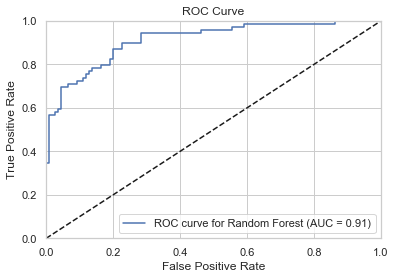

In [47]:
plt_roc_curve("Random Forest", ranfor,has_proba=True)

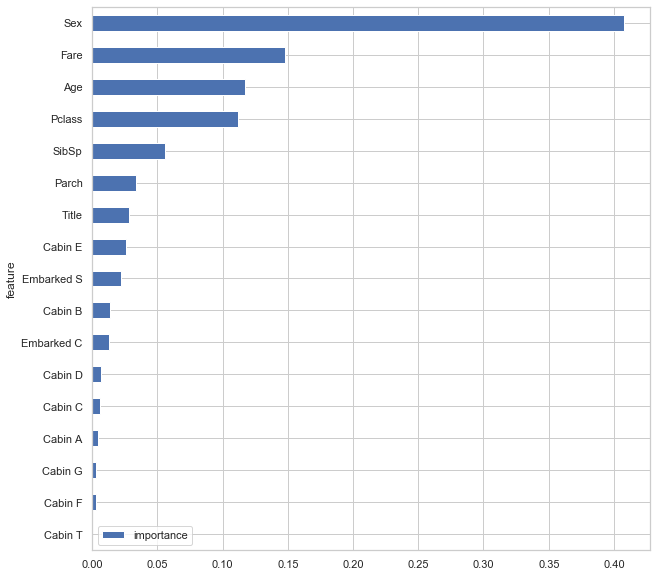

In [48]:
importance_of_features(ranfor)

In [49]:
prediction_test = logreg.predict(test.drop('PassengerId', axis=1).copy())
submission=pd.DataFrame({'PassengerId': test['PassengerId'], "Survived": prediction_test})
submission.to_csv("submission(logistic regression).csv", index=False)

In [50]:
prediction_test = gauss.predict(test.drop('PassengerId', axis=1).copy())
submission=pd.DataFrame({'PassengerId': test['PassengerId'], "Survived": prediction_test})
submission.to_csv("submission(naïve Bayes).csv", index=False)

In [51]:
prediction_test = ranfor.predict(test.drop('PassengerId', axis=1).copy())
submission=pd.DataFrame({'PassengerId': test['PassengerId'], "Survived": prediction_test})
submission.to_csv("submission(random forest).csv", index=False)